# Logistics

* If you feel lost while working on this notebook (in class or outside or class), don't hesitate to post questions here: https://piazza.com/class/jrzeap5kpirw

# Description of the dataset

The file "Bertrand-physiodata.csv" was captured using the Empatica E4 wristband when Bertrand was teaching a class last Fall. The E4 collects information about a person's heart rate, electrodermal actibity, movements and temperature:

![title](https://support.empatica.com/hc/article_attachments/360000797783/e4_specs.jpg)

the csv file contains the following columns:
* **tags**: users can tag events by pressing a button on the wristband
* **real time**: time of the data collection
* **unix time**: number of seconds since 00:00:00 Thursday, 1 January 1970
* **BVP**: Blood volume pressure (used to compute HR data)
* **HR**: Heart rate data
* **EDA**: Electrodermal activity (i.e., physiological arousal)
* **TEMP**: temperature of the skin
* **ACC_x**: accelerometer data on the x axis
* **ACC_y**: accelerometer data on the y axis
* **ACC_z**: accelerometer data on the z axis

Today we are going to explore Bertrand's physiological response to teaching! :) more specifically, we are going to explore the relationship between heart rate and electrodermal activity. 

# Panda Review

Concepts: 
* head, tail, info, values
* zip, dict, pd.DataFrame
* df.columns
* read_csv, delimiter, header, index



In [167]:
# 1) import the pandas library as pd
import pandas as pd

In [168]:
# 2) import the csv file into a variable called df
df = pd.read_csv('Bertrand-physiodata.csv')

In [169]:
# 3) print the column names, just to make 
# sure that it matches what we have above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [170]:
# 4) use the head() function to check your data
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [171]:
# 5) use the tail() function on your dataframe. How many rows do you have?
df.tail()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
333871,2.0,9/11/18 09:55,1.536674e+09,-2.74,NaN,NaN,NaN,NaN,NaN,NaN
333872,2.0,9/11/18 09:55,1.536674e+09,-2.11,NaN,NaN,NaN,-43.0,15.0,44.0
333873,2.0,9/11/18 09:55,1.536674e+09,-1.64,NaN,NaN,NaN,NaN,NaN,NaN
333874,2.0,9/11/18 09:55,1.536674e+09,-1.48,NaN,NaN,NaN,-42.0,15.0,44.0
333875,NaN,NaN,NaN,-1.66,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
# 6) use the info() function to inspect your data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [173]:
# 7) knowing that BVP is collected 64 times per second (i.e., 64Hz),
# what can you tell of the sampling frequency of the other measures?
df.HR.mode()

0    84.03
dtype: float64

In [174]:
HR_rate_1 = (5203 / 333575 * 64)
print(HR_rate_1)

EDA_rate_1 = (20849 / 333575 * 64)
print(EDA_rate_1)

HR_rate_2 = 333575 / 5203

0.9982522671063478
4.000107921756727


In [175]:
#Answer in the class
HR_rate_2 = 333575 / 5203
print(HR_rate_2)

TEMP_frequency = 333575 / 20848
print(TEMP_frequency)

64.11205073995772
16.00033576362241


# Plotting

Concepts: 
* plot, subplot, line plots, scatter, box plots, hist, ...
* mean, median, quantiles, STD, etc. 
* separate and summarize

In [176]:
# 8) make sure you're plotting your graphs inline
# Hint: https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Let's work on the heart rate (HR) data first

In this section we are going to produce various graphs to inspect Bertrand's heart rate data. 

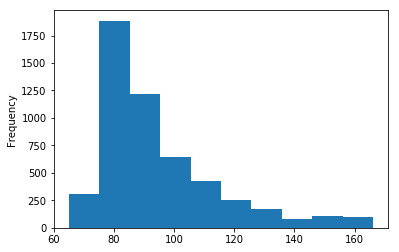

In [177]:
# 9) produce a histogram of the heart rate data; what can you say from it?


df.HR.plot(kind='hist')

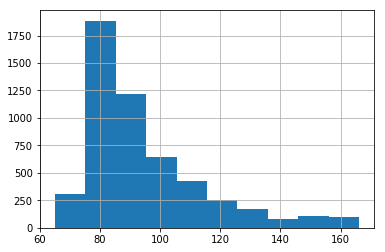

In [178]:
df['HR'].hist()

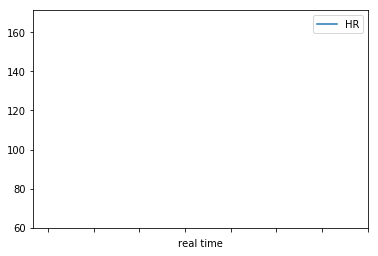

In [179]:
# 10) Try to plot the values over time (e.g., use the real time for the x axis):
df.plot(x='real time',y='HR')

11) What happened? Come up with 2-3 reasons why this didn't work before you move on to the next question:
- reason 1: Too many time values given the size of the chart
- reason 2: The range of HR values might not fit the y axis
- reason 3: They could be stored over different time periods.
- reason 4: we didn't filter out missing values. 
- reason 5: real time is a string.
- reason 6: there is so much data (HR) per real time. There is not enough space to plot HR data.

After you've anwered the question above, feel free to look at this hint and try to fix your dataframe: https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings/22553757

In [180]:
# 12) Fix your dataframe using the link above: 
df_clean = df[df['HR'].notnull()]
df_clean.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
640,0.0,9/11/18 08:28,1.536669e+09,-79.05,72.00,1.059777,33.31,-13.0,65.0,-24.0
704,0.0,9/11/18 08:28,1.536669e+09,218.11,71.50,1.125105,33.31,-35.0,-7.0,34.0
768,0.0,9/11/18 08:28,1.536669e+09,-20.02,65.00,1.501703,33.31,-40.0,-12.0,34.0
832,0.0,9/11/18 08:28,1.536669e+09,76.70,92.25,1.204524,33.31,-31.0,13.0,46.0
896,0.0,9/11/18 08:28,1.536669e+09,71.85,87.60,1.184028,33.31,-38.0,8.0,51.0


In [181]:
df_clean = df.dropna()
df_clean.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
640,0.0,9/11/18 08:28,1.536669e+09,-79.05,72.00,1.059777,33.31,-13.0,65.0,-24.0
704,0.0,9/11/18 08:28,1.536669e+09,218.11,71.50,1.125105,33.31,-35.0,-7.0,34.0
768,0.0,9/11/18 08:28,1.536669e+09,-20.02,65.00,1.501703,33.31,-40.0,-12.0,34.0
832,0.0,9/11/18 08:28,1.536669e+09,76.70,92.25,1.204524,33.31,-31.0,13.0,46.0
896,0.0,9/11/18 08:28,1.536669e+09,71.85,87.60,1.184028,33.31,-38.0,8.0,51.0


### Now let's look at the electrodermal activity data (EDA)

In this section we are going to produce various graphs to inspect Bertrand's electrodermal data. 

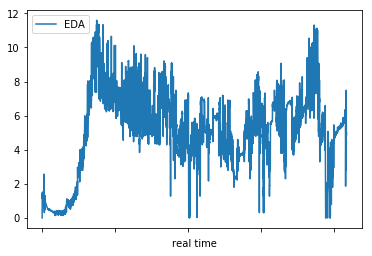

In [182]:
# 13) produce a line plot to visually inspect the EDA data
# Hint: make sure you filter the nonnull data
df_clean_EDA = df[df['EDA'].notnull()]
df_clean_EDA.plot (x = 'real time', y = 'EDA')

Feel free to look at the following page to make sense of the units of the EDA data: 
* https://support.empatica.com/hc/en-us/articles/203621955-What-should-I-know-to-use-EDA-data-in-my-experiment-

Text(0.5,0,'Real Time')

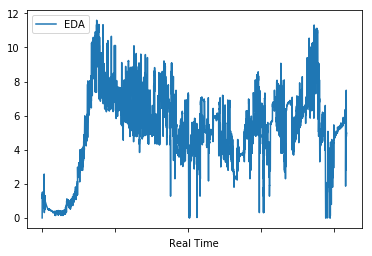

In [183]:
# 14) we don't have any labels on the x axis! 
# convert the 'real time' column into a real date time
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=3
df_clean_EDA = df[df['EDA'].notnull()]
df_clean_EDA.plot (x = 'real time', y = 'EDA')
plt.xlabel('Real Time')





In [184]:
time_format = '%m/%d/%y %H:%M'
# time_format="%m/%d/%y %H:%M"
real_date_time = pd.to_datetime(df['real time'], format = time_format)


In [185]:
# 15) print the mean and median values of the EDA data; explain how they are different
df_clean_EDA.describe()

,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
count,20849.000000,2.084900e+04,20844.000000,5203.000000,20849.000000,20848.000000,20849.000000,20849.000000,20849.000000
mean,1.035685,1.536672e+09,0.232785,94.687246,5.180507,33.224524,-42.702384,19.021824,6.591395
std,0.262582,1.504683e+03,150.193488,19.705532,2.425996,0.989483,17.707598,29.973827,29.951392
min,0.000000,1.536669e+09,-1865.000000,65.000000,0.000000,30.070000,-128.000000,-118.000000,-128.000000
25%,1.000000,1.536670e+09,-40.317500,81.375000,3.885000,32.830000,-56.000000,-1.000000,-15.000000
50%,1.000000,1.536672e+09,1.020000,87.670000,5.320238,33.230000,-43.000000,15.000000,11.000000
75%,1.000000,1.536673e+09,43.972500,103.190000,6.748247,34.070000,-33.000000,47.000000,29.000000
max,2.000000,1.536674e+09,1784.800000,166.170000,11.594843,34.710000,127.000000,127.000000,127.000000


The median EDA is slightly higher than the mean - this may be because Bertrand wasn't wearing the watch for a period of time at the beginning of or before the lesson. 

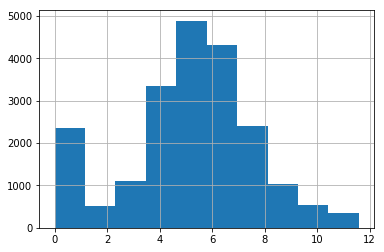

In [186]:
# 16) plot a histogram of the EDA values; does that confirm your interpretation above?
df['EDA'].hist()

### Combining EDA and HR data on the same graph

In this section we are going to produce various graphs to inspect both the HR and EDA data.

In [187]:
# 17) filter both the EDA and HR values to keep the non-null rows:
df_clean_EDA = df[df['EDA'].notnull()]
df_clean_HR =  df[df['HR'].notnull()]

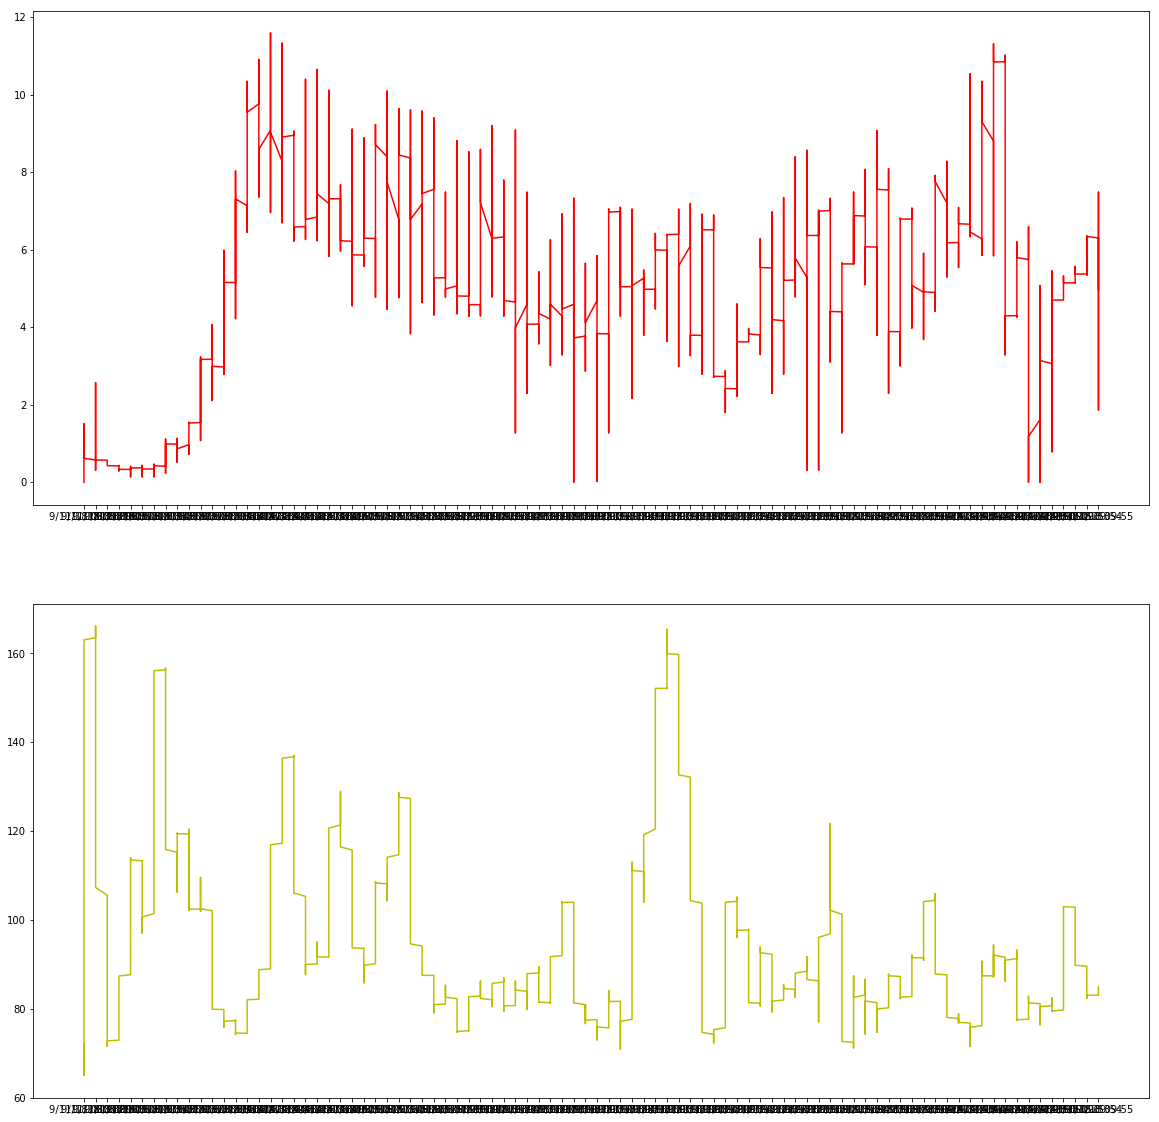

In [188]:
# 18) plot EDA and HR on two different graphs using subplots
# hint: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
ax[0].plot(df_clean_EDA['real time'], df_clean_EDA['EDA'],c='r')
ax[0].ti
ax[1].plot(df_clean_HR['real time'], df_clean_HR['HR'],c='y')



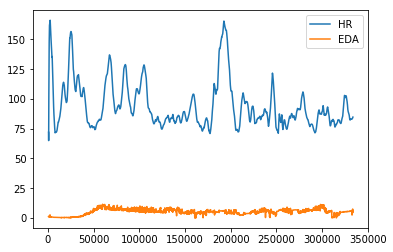

In [189]:
# 19) plot EDA and HR on the same graph; what went wrong?
df_clean_HR_EDA = df_clean[['HR','EDA']]
df_clean_HR_EDA.plot()


You lose the granularity of the EDA data because the heart rate data is so much more variable. 

In [190]:
# 20) normalize the HR and EDA columns using your favorite normalization strategy
# Hint: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas

df_clean_HR_EDA['HR'] = (df_clean_HR_EDA["HR"] - df_clean_HR_EDA["HR"].mean()) / (df_clean_HR_EDA['HR'].max() - df_clean_HR_EDA['HR'].min())
df_clean_HR_EDA['EDA'] = (df_clean_HR_EDA["EDA"] - df_clean_HR_EDA["EDA"].mean()) / (df_clean_HR_EDA['EDA'].max() - df_clean_HR_EDA['EDA'].min())




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


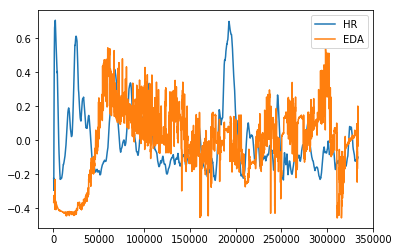

In [191]:
# 21) plot EDA and HR on the same graph; does the result look better?
df_clean_HR_EDA.plot()

This is better because you get a greater sense of the correlation between HR and EDA.

###### 22) what can you observe from the graph? Does there seem to be an agreement between HR and EDA
There does - although not immediately

**IN-CLASS DISCUSSION**: why do we normalize values? When do we want to normalize them?

# Time series

Concepts:
* indexing, slicing, datetimeIndex
* resampling, rolling mean
* method chaining and filtering
* plotting time series

In this section, we are going to work with some built-in function of pandas to work with time series. More specifically, we are going to downsample our data and use a rolling window to generate additional graphs.

In [192]:
# let's reimport our data to make sure it's clean
df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')

filtered_df.head()

,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
real time,,,,,,,,,
2018-11-09 08:28:00,0.0,1.536669e+09,0.00,NaN,0.000000,33.31,-50.0,7.0,28.0
2018-11-09 08:28:00,0.0,1.536669e+09,-0.05,NaN,0.836457,33.31,-32.0,64.0,27.0
2018-11-09 08:28:00,0.0,1.536669e+09,6.20,NaN,1.183860,33.31,-14.0,57.0,50.0
2018-11-09 08:28:00,0.0,1.536669e+09,22.90,NaN,1.167277,33.31,-22.0,52.0,24.0
2018-11-09 08:28:00,0.0,1.536669e+09,93.76,NaN,1.278719,33.31,-17.0,53.0,27.0


### Down sampling

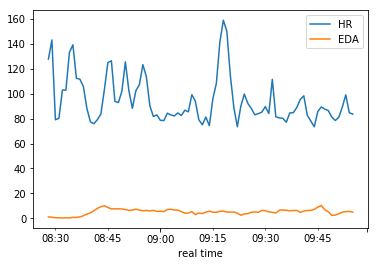

In [193]:
# 23) Use the instruction from datacampto resample your data in 60 seconds windows and plot the result
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7
df_downsampled = filtered_df[['HR','EDA']].resample('T').mean()
#df_downsampled.plot()
df_downsampled.plot()

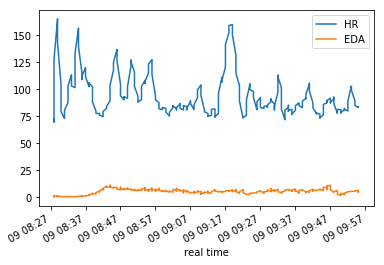

In [194]:
# 24) do the same thing, but this time using the rolling() function in a 60sec window
df_downsampled2 = filtered_df[['HR','EDA']].rolling('60s').mean()
df_downsampled2.plot()

###### 25) What is the difference between rolling() and resample()? Why do the graphs look different?
Rolling is time-based while resample is frequency based. I'm not totally sure why rolling has more observations

## Correlations

In this section we're going to keep exploring the relationship between heart rate data and electrodermal activity. We are going to do this visually (with a scatter plot first) and then using a statistical test (Pearson's correlation). 

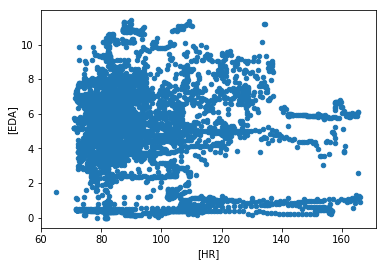

In [195]:
# 26) create a scatter plot between HR and EDA:
filtered_df.plot(x=['HR'],y=['EDA'],kind='scatter')

In [196]:
# 27) compute pearson's correlation between the HR and EDA data
filtered_df[['HR','EDA']].corr('pearson')

,HR,EDA
HR,1.000000,-0.138619
EDA,-0.138619,1.000000


###### 29) what can you conclude? Is there a linear relationship between HR and EDA data in this dataset?
This test suggests a slight negative correlation - an increase of one is associated with a 0.13 reduction in EDA...however based on the normalized plot above I think the story here is more complex than just being a simple correlation. 